In [7]:
from collections.abc import Sequence
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
actors = [
    {"id": "nm0425005", "name": "Dwayne Johnson"},
    {"id": "nm1165110", "name": "Chris Hemsworth"},
    {"id": "nm0000375", "name": "Robert Downey Jr."},
    {"id": "nm0474774", "name": "Akshay Kumar"},
    {"id": "nm0000329", "name": "Jackie Chan"},
    {"id": "nm0177896", "name": "Bradley Cooper"},
    {"id": "nm0001191", "name": "Adam Sandler"},
    {"id": "nm0424060", "name": "Scarlett Johansson"},
    {"id": "nm0005527", "name": "Sofia Vergara"},
    {"id": "nm0262635", "name": "Chris Evans"}
]
stopword_list = ["movie", "help", "save", "life", "world", "one", "new"]

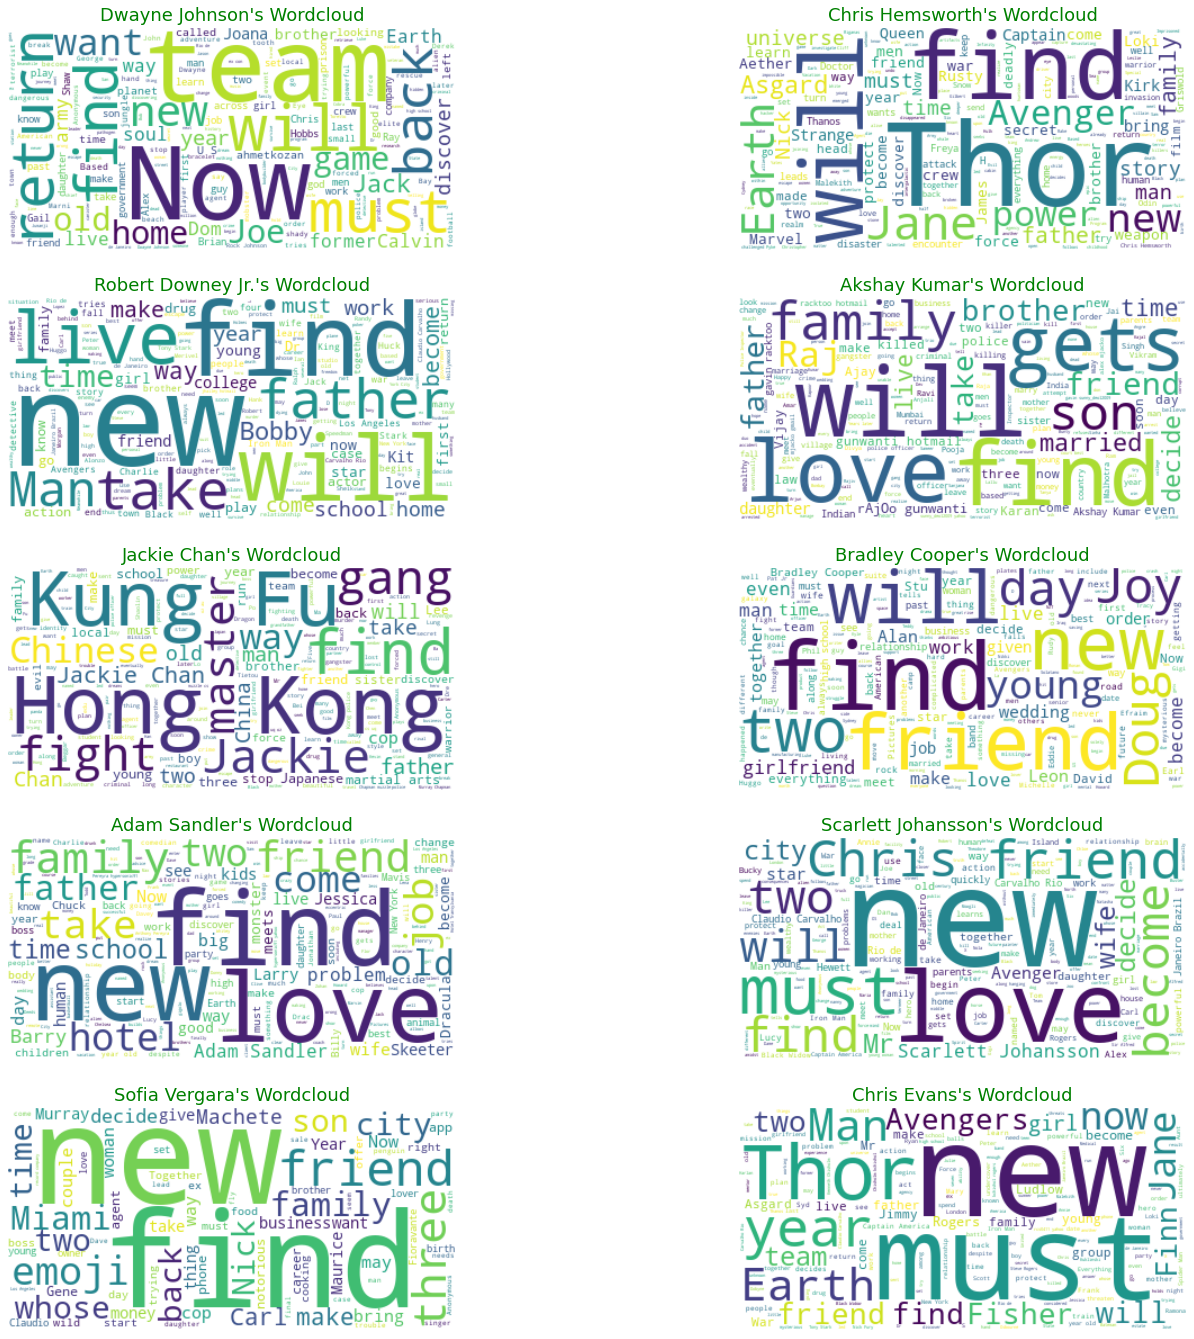

In [14]:
fig, ax = plt.subplots(5,2,figsize=(24,24))

for actor_data, rc in [(n, rc) for (n, rc) in zip(actors, [(r, c) for r in range(5) for c in range(2)])]:
    
    actor_movies_descriptions = []
    actor_id = actor_data["id"]
    actor_name = actor_data["name"]
    with open(f'./data/movie_descriptions_{actor_id}.json', 'r', encoding='utf8') as json_file:
        json_content = json_file.read()
        descriptions = json.loads(json_content)
        for movie_id, movie_data in descriptions.items():
            actor_movies_descriptions.append(movie_data["description"])
            
    text = " ".join(actor_movies_descriptions)
    stopwords = set(STOPWORDS)
    stopwords.update(stopword_list)
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
    
    r, c = rc
    ax[r][c].set_title(f"{actor_name}\'s Wordcloud", fontdict={'fontsize': 24, 'fontweight': 10, 'color': 'g'})
    ax[r][c].imshow(wordcloud, interpolation='bilinear')
    ax[r][c].axis('off')
    plt.axis("off")
plt.show()